# Market Basket Analysis

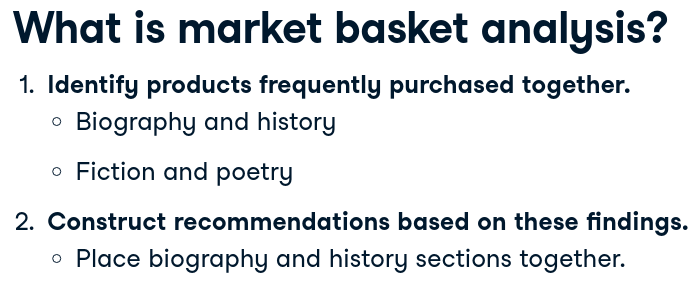

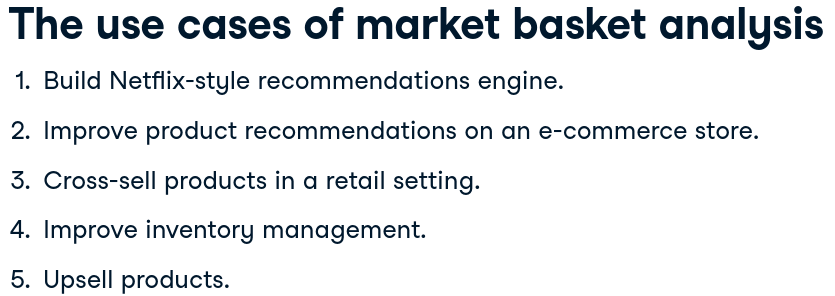

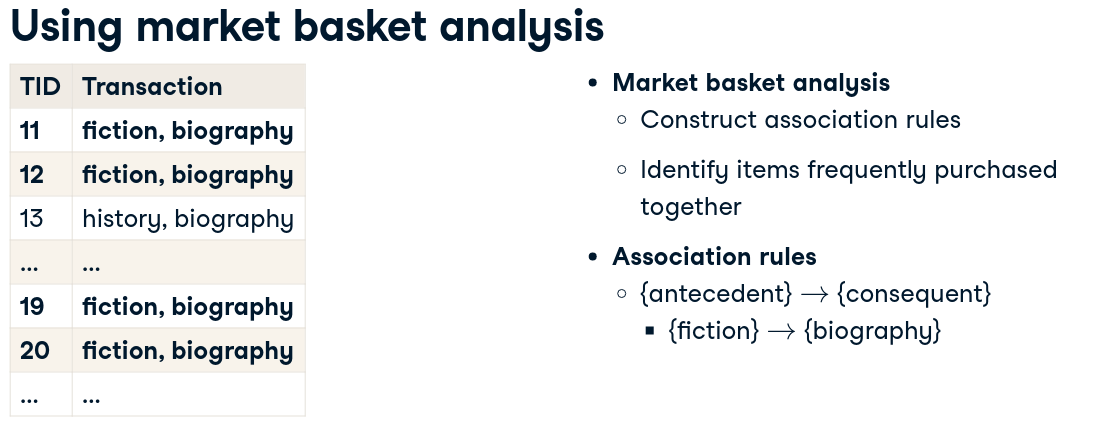

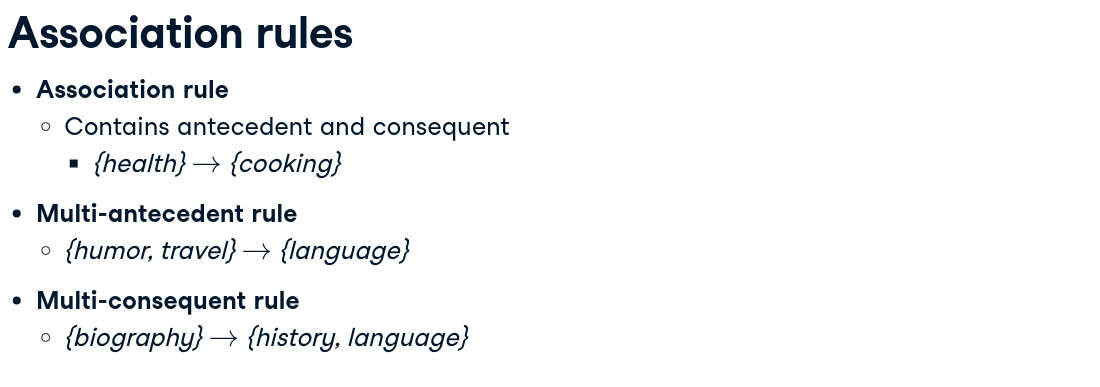

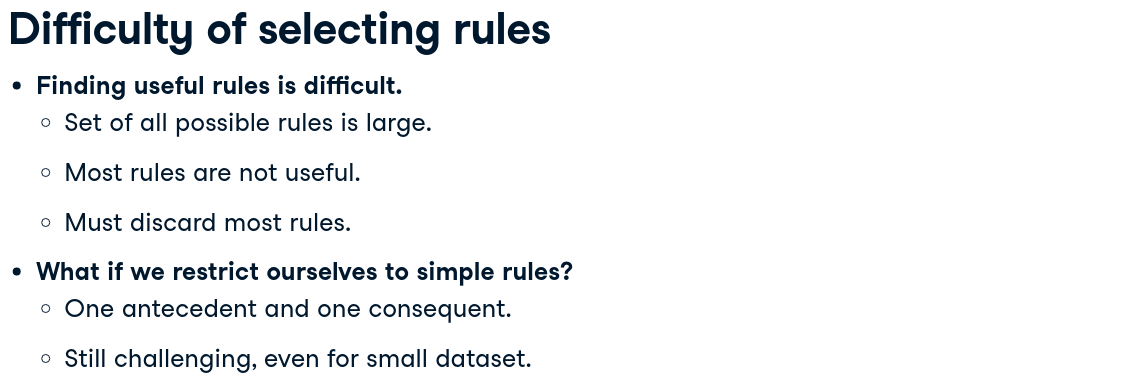

In [ ]:
# WE NEED THE TRANSACTION DATA ORGANIZED INTO A LIST OF LISTS

# convert comma separated string values into a list
transactions = df['transactions'].apply(lambda t: t.split(','))

#convert the feature into a list of lists
transactions = list(transactions)

In [ ]:
#GENERATING RULES WITH ITERTOOLS

from itertools import permutations

#extract unique items
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattended))

#compute and print rules
rules = list(permutations(items,2))
rules

In [ ]:
#GENERATIG RULES USING MLXTEND

#import functions
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

#compute frequent itemsets using the Apriori Algo
frequent_items = apriori(onehot, min_support = 0.001, 
                        max_len = 2, use_colnames=True)


#compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                         metric='lift',
                         min_threshold = 1.0)


# Metrics & Pruning

A **metric** is a measure of performance for rules.

**Pruning** is the use of metrics to discard rules.

# The Simplest Metric: Support

The support metric measures the share of transactions that contain an itemset: 

$$Support(X) = \frac{\text{number of transactions with item(s)}}{\text{number of transactions (N)}}$$

$$Support(X) = \frac{\text{Frequency (X)}}{\text{N}}$$

$$Support(X \Rightarrow Y) = \frac{\text{Frequency (X&Y)}}{\text{N}}$$


# Confidence

The probability that we will purchase y given that we have purchased x.

$$Confidence (X \Rightarrow Y) = \frac{support (X \Rightarrow Y)}{\text{support of X}}$$


# Lift

$$Lift (X \Rightarrow Y) = \frac{support (X \Rightarrow Y)}{\text{(support of X)(support Y)}}$$

- Numerator: Proportion of transactions that contain x and y
- Denominator: Proportion if x and y are assigned randomly and independently
- A value greater than 1 indicates that the pair occur more often then we would attribute to random chance
- ranges between 0 and $\infty$

# Leverage

$$ \text{Leverage}(X \Rightarrow Y) = \text{support (X&Y)} - Support(X)Support(Y)$$

- Leverage is similar to lift, but easier to interpret
- Leverage lies between -1 & +1

# Conviction

$$ Conviction (X \Rightarrow Y) = \frac{support(X)support(Y)}{support (X and \overline{Y})}$$


- $\overline{Y}$ is "not Y"
- If conviction is greater than 1 X & Y occur less frequently than expected


# Preparing the Data

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder
encoder = TransactionEncoder().fit(transactions_list_of_lists)

In [ ]:
#onehot encode itemsets by applying fit and transform

onehot = encoder.transform(transactions_list_of_lists)

In [ ]:
# ultimately you want a dataframe of onehot encoded (true/false) features with each item as a feature name
# the mean of each feature is the support metric for that feature

#calculating the support for a combination of two features
data['fiction+poetry'] = np.logical_and(data['fiction'], data['poetry'])
data['fiction+poetry'].mean()

# Calculating Support, Confidence, & Lift

In [ ]:
# Compute support for Hunger and Potter
supportHP = np.logical_and(books['Hunger'], books['Potter']).mean()

# Compute support for Hunger and Twilight
supportHT = np.logical_and(books['Hunger'], books['Twilight']).mean()

# Compute support for Potter and Twilight
supportPT = np.logical_and(books['Potter'], books['Twilight']).mean()

# Print support values
print("Hunger Games and Harry Potter: %.2f" % supportHP)
print("Hunger Games and Twilight: %.2f" % supportHT)
print("Harry Potter and Twilight: %.2f" % supportPT)

In [ ]:
# Compute support for Potter and Twilight
supportPT = np.logical_and(books['Potter'], books['Twilight']).mean()

# Compute support for Potter
supportP = books['Potter'].mean()

# Compute support for Twilight
supportT = books['Twilight'].mean()

# Compute confidence for both rules
confidencePT = supportPT / supportP
confidenceTP = supportPT / supportT

# Print results
print('{0:.2f}, {1:.2f}'.format(confidencePT, confidenceTP))

In [ ]:
# Compute support for Potter and Twilight
supportPT = np.logical_and(books['Potter'], books['Twilight']).mean()

# Compute support for Potter
supportP = books['Potter'].mean()

# Compute support for Twilight
supportT = books['Twilight'].mean()

# Compute lift
lift = supportPT / (supportP * supportT)

# Print lift
print("Lift: %.2f" % lift)

# Calculating Conviction

In [ ]:
# Compute support for Potter AND Hunger
supportPH = np.logical_and(books['Potter'], books['Hunger']).mean()

# Compute support for Potter
supportP = books['Potter'].mean()

# Compute support for NOT Hunger
supportnH = 1.0 - books['Hunger'].mean()

# Compute support for Potter and NOT Hunger
supportPnH = supportP - supportPH

# Compute and print conviction for Potter -> Hunger
conviction = supportP * supportnH / supportPnH
print("Conviction: %.2f" % conviction)

In [ ]:
def conviction(antecedent, consequent):
# Compute support for antecedent AND consequent
supportAC = np.logical_and(antecedent, consequent).mean()

# Compute support for antecedent
supportA = antecedent.mean()

# Compute support for NOT consequent
supportnC = 1.0 - consequent.mean()

# Compute support for antecedent and NOT consequent
supportAnC = supportA - supportAC

# Return conviction
return supportA * supportnC / supportAnC

# Association & Dissociation

## Zhang's Metric (J'an's)

- Bounded: -1 and +1
- Value of +1 indicates perfect association
- Value of -1 indicates perfect dissociation

$$ \frac{Confidence(A \Rightarrow B) - Confidence(\overline A \Rightarrow B)}
        {Max[Confidence(A \Rightarrow B), Confidence(\overline A \Rightarrow B)]}$$
        
        
$$Confidence (A \Rightarrow B) = \frac{support (A and B)}{suport (A)}$$

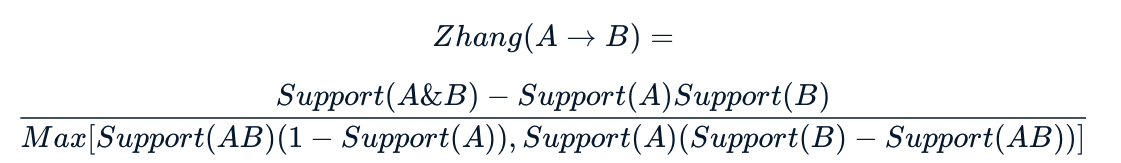

In [ ]:
# Compute the support of Twilight and Harry Potter
supportT = books['Twilight'].mean()
supportP = books['Potter'].mean()

# Compute the support of both books
supportTP = np.logical_and(books['Twilight'], books['Potter']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

In [ ]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
	# Compute the support of each book
	supportA = antecedent.mean()
	supportC = consequent.mean()

	# Compute the support of both books
	supportAC = np.logical_and(antecedent, consequent).mean()

	# Complete the expressions for the numerator and denominator
	numerator = supportAC - supportA*supportC
	denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

	# Return Zhang's metric
	return numerator / denominator

# Advanced Metrics

## Standard Procedure for market basket analysis
- Generate large set of rules
- Filter rules using metrics
- Apply intuition & common sense

In [ ]:
# Preview the rules DataFrame using the .head() method
print(rules.head())

# Select the subset of rules with antecedent support greater than 0.05
rules = rules[rules['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules = rules[rules['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules = rules[rules['conviction'] > 1.01]

# Print remaining rules
print(rules)

# Set the lift threshold to 1.5
rules = rules[rules['lift'] > 1.5]

# Set the conviction threshold to 1.0
rules = rules[rules['conviction'] > 1.0]

# Set the threshold for Zhang's rule to 0.65
rules = rules[rules['zhang'] > 0.65]

# Print rule
print(rules[['antecedents','consequents']])

# Aggregation

It's helpful to simplify analysis by grouping items into categories



In [ ]:
# Select the column headers for sign items
sign_headers = [i for i in onehot.columns if i.lower().find('sign')>=0]

# Select columns of sign items
sign_columns = onehot[sign_headers]

# Perform aggregation of sign items into sign category
signs = sign_columns.sum(axis = 1) >= 1.0

# Print support for signs
print('Share of Signs: %.2f' % signs.mean())

# The Apriori Algorithm

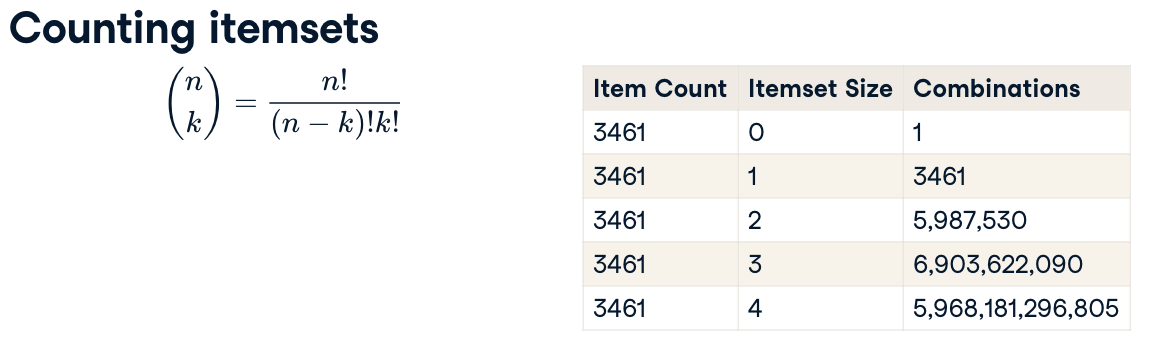

It's not possible to consider all itemsets, or even enumerate them. We could cap the nunmber of items, k, in each itemset i.e. at 3. The Apriori algorithm offers an alternative to this.

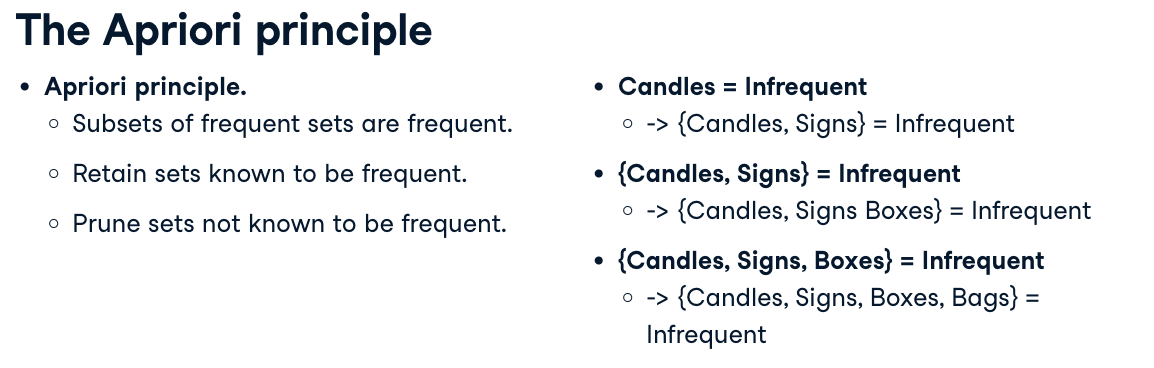

This ignores items that appear infrequently. Which could be problematic if we are looking to understand processes with low frequency or signal (spam, insider trading, terrorism, etc).

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.006, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
print(frequent_itemsets.head())

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.003 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.003, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.001 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.001, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

# Apriori Result Pruning

In [ ]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.001, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                         	min_threshold = 1.0)

# Print association rules
print(rules)

In [ ]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.005
rules = rules[rules['antecedent support'] > 0.005]

# Set consequent support to 0.005
rules = rules[rules['consequent support'] > 0.005]

# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)

# Set the lower bound for Zhang's rule to 0.98
rules = rules[rules['zhang'] > 0.98]
print(rules[['antecedents', 'consequents']])

In [ ]:
# Apply the Apriori algorithm with a minimum support threshold of 0.001
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Recover association rules using a minium support threshold of 0.001
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)

# Apply a 0.002 antecedent support threshold, 0.60 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.002) &
						(rules['consequent support'] > 0.01) &
						(rules['confidence'] > 0.60) &
						(rules['lift'] > 2.50)]

# Print remaining rule
print(filtered_rules[['antecedents','consequents']])

# Viz Methods for Association Rules

## Heatmaps

### Preparing the Data
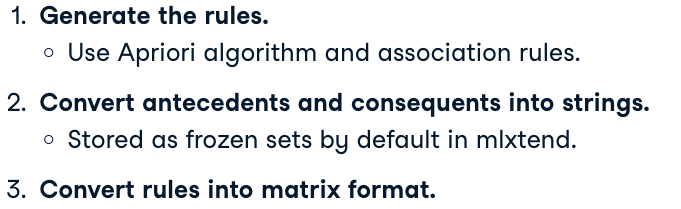

In [ ]:
# Compute frequent itemsets using a minimum support of 0.07
frequent_itemsets = apriori(onehot, min_support = 0.07, 
                            use_colnames = True, max_len = 2)

# Compute the association rules
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = 0.0)

# Replace frozen sets with strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar = False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

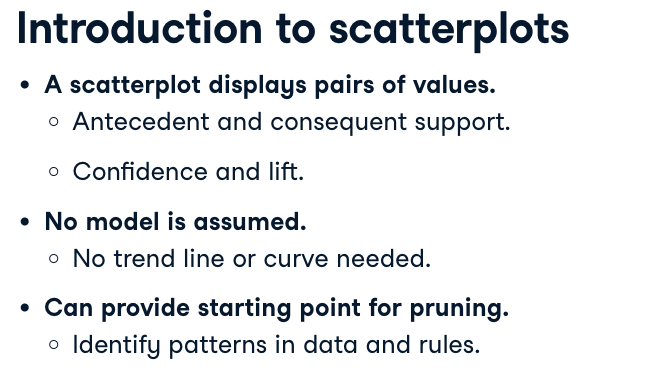

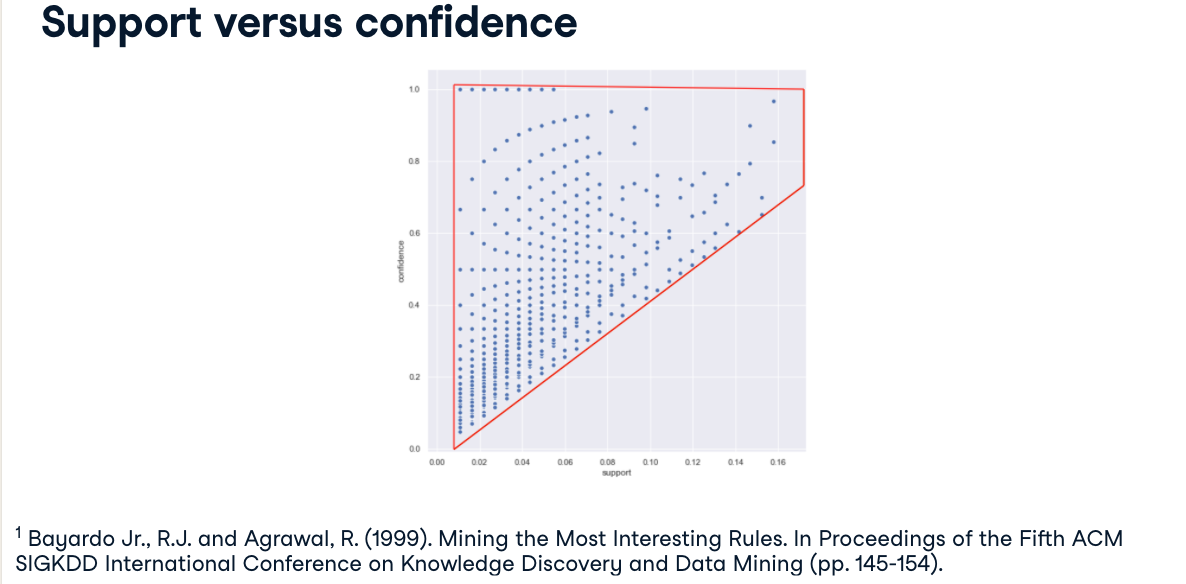
### *


In [ ]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()



## Parallel Coordinates Plot

